# Project Milestone2_DSC540

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#read csv  data into dataframe
df = pd.read_csv("monroe_county_crash_data2003_to_2015.csv")
df.head(5) # print first few lines of the data

,Master Record Number,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Primary Factor,Reported Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [3]:
# Print stats of the data
df.describe()

,Master Record Number,Year,Month,Day,Hour,Latitude,Longitude
count,5.394300e+04,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,6.748119e+08,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.907563e+08,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,1.470500e+04,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,1.991074e+06,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,9.011241e+08,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,9.019039e+08,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,9.026394e+08,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [4]:
# print the number of rows and number of columns
df.shape

(53943, 12)

In [5]:
#Create a list with column headers
col_names = ['Sequence_Number','Crash_Year','Crash_Month','Crash_Day','Weekend_Weekday','Time_Hour',
             'Collision_Type','Injury_Type','Primary_Crash_Reason','Reported_Location',
             'Latitude_Geographic_Location','Longitude_Geographic_Location']

#read csv into dataframe after replacing the header with a pre-defined names
df = pd.read_csv("monroe_county_crash_data2003_to_2015.csv", header = 0, names = col_names)
df.head(5)

,Sequence_Number,Crash_Year,Crash_Month,Crash_Day,Weekend_Weekday,Time_Hour,Collision_Type,Injury_Type,Primary_Crash_Reason,Reported_Location,Latitude_Geographic_Location,Longitude_Geographic_Location
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [6]:
#Verify the data if there are any duplicates

dup_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(dup_df)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Sequence_Number, Crash_Year, Crash_Month, Crash_Day, Weekend_Weekday, Time_Hour, Collision_Type, Injury_Type, Primary_Crash_Reason, Reported_Location, Latitude_Geographic_Location, Longitude_Geographic_Location]
Index: []


From the above output, we can observe that there are no duplicates in the Crash dataset.

In [7]:
# print the data types of the columns
df.dtypes

Sequence_Number                    int64
Crash_Year                         int64
Crash_Month                        int64
Crash_Day                          int64
Weekend_Weekday                   object
Time_Hour                        float64
Collision_Type                    object
Injury_Type                       object
Primary_Crash_Reason              object
Reported_Location                 object
Latitude_Geographic_Location     float64
Longitude_Geographic_Location    float64
dtype: object

In [8]:
# Checking the count of null values in each column
df.isnull().sum()

Sequence_Number                     0
Crash_Year                          0
Crash_Month                         0
Crash_Day                           0
Weekend_Weekday                    68
Time_Hour                         225
Collision_Type                      6
Injury_Type                         0
Primary_Crash_Reason             1121
Reported_Location                  35
Latitude_Geographic_Location       30
Longitude_Geographic_Location      30
dtype: int64

In [9]:
# concatenate 3 fields and build new field 'date_calc'

Crash_Year_List = df['Crash_Year'].values.tolist()  # Create list using dataframe column Crash_Year
Crash_Month_List = df['Crash_Month'].values.tolist() # Create list using dataframe column Crash_month
Crash_Day_List = df['Crash_Day'].values.tolist() # Create list using dataframe column Crash_day

# Create and Add NEw field 'data_calc' to the dataframe 
df1 = pd.DataFrame({'year': Crash_Year_List, 'month': Crash_Month_List, 'day': Crash_Day_List})
df['date_calc'] = pd.to_datetime(df1)

df.head()

,Sequence_Number,Crash_Year,Crash_Month,Crash_Day,Weekend_Weekday,Time_Hour,Collision_Type,Injury_Type,Primary_Crash_Reason,Reported_Location,Latitude_Geographic_Location,Longitude_Geographic_Location,date_calc
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,2015-01-05
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,2015-01-06
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,2015-01-06
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,2015-01-07
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,2015-01-07


In [10]:
# Showing New Field created 'date_calc'

df2 = df.loc[1:5, ['Crash_Year','Crash_Month','Crash_Day','date_calc']]
df2.head()

,Crash_Year,Crash_Month,Crash_Day,date_calc
1,2015,1,6,2015-01-06
2,2015,1,6,2015-01-06
3,2015,1,7,2015-01-07
4,2015,1,7,2015-01-07
5,2015,1,6,2015-01-06


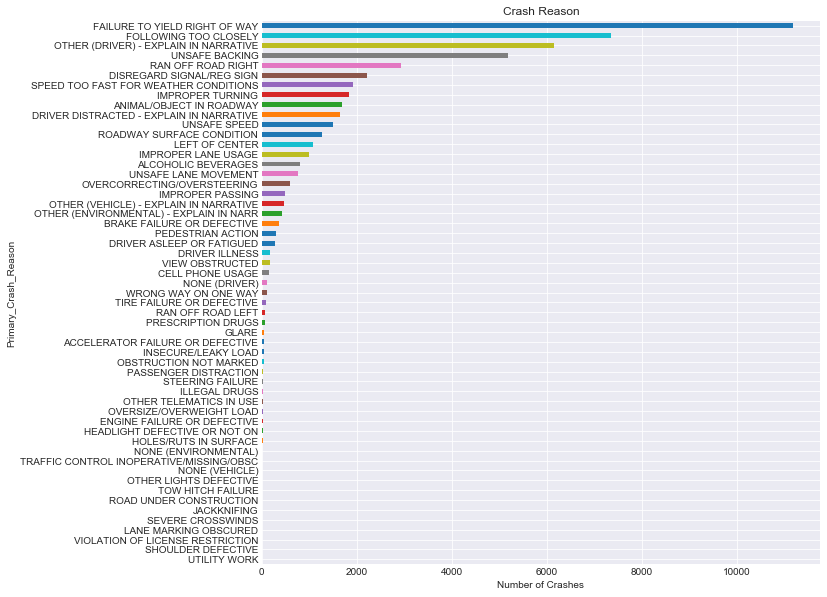

In [11]:
# Bar Graph to show the 'Crash Reason' vs 'number of crashes'.

plt.figure(figsize=(10,10))
df.groupby(['Primary_Crash_Reason']).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Crashes')
plt.title('Crash Reason')
plt.show()

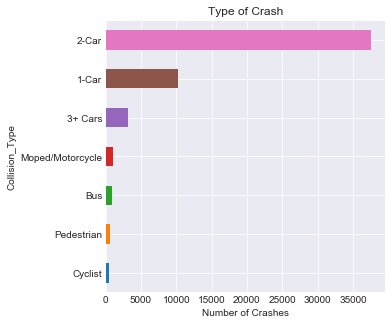

In [12]:
# Bar Graph to show the 'Collision Type' vs 'number of crashes'.

plt.figure(figsize=(5,5))
df.groupby(['Collision_Type']).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Crashes')
plt.title('Type of Crash')
plt.show()

Text(0.5,1,'Crash by Injury_Type')

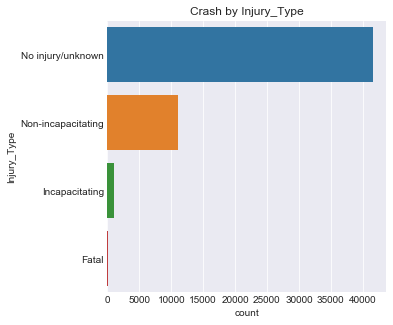

In [13]:
# Bar Graph to show the 'Injury Type' vs 'number of crashes'.

plt.figure(figsize=(5,5))
df_loc=df['Injury_Type'].value_counts().iloc[:20].index
sns.countplot(y='Injury_Type',data=df,order=df_loc)
plt.title('Crash by Injury_Type')

In [14]:
# Number of Crashes by Year
Crash_Year_Count=df.groupby("Crash_Year",sort=False)["Sequence_Number"].count().sort_values(ascending=False)
Crash_Year_Count

Crash_Year
2003    4625
2008    4341
2015    4313
2004    4269
2012    4223
2014    4167
2010    4060
2013    4058
2007    4055
2009    4014
2005    3967
2006    3937
2011    3914
Name: Sequence_Number, dtype: int64

In [15]:
# Number of Crashes by Month
Crash_Year_Month=df.groupby("Crash_Month",sort=False)["Sequence_Number"].count().sort_values(ascending=False)
Crash_Year_Month

Crash_Month
10    5581
9     4994
11    4884
1     4665
12    4598
4     4574
2     4541
8     4480
5     4212
3     3842
7     3820
6     3752
Name: Sequence_Number, dtype: int64

In [16]:
df.dtypes

Sequence_Number                           int64
Crash_Year                                int64
Crash_Month                               int64
Crash_Day                                 int64
Weekend_Weekday                          object
Time_Hour                               float64
Collision_Type                           object
Injury_Type                              object
Primary_Crash_Reason                     object
Reported_Location                        object
Latitude_Geographic_Location            float64
Longitude_Geographic_Location           float64
date_calc                        datetime64[ns]
dtype: object

In [17]:
import sqlite3   # import sqlite3 package
conn = sqlite3.connect('DSC540_monroe_county.db')  # connect to database
c = conn.cursor()    # create an instance

In [19]:
# Create table - MONROE_COUNTY
c.execute('''CREATE TABLE MONROE_COUNTY(
[Sequence_Number] INTEGER,
[Crash_Year]  INTEGER,
[Crash_Month]  INTEGER,
[Crash_Day]  INTEGER,
[Weekend_Weekday] TEXT,
[Time_Hour] FLOAT,
[Collision_Type] TEXT,
[Injury_Type] TEXT,
[Primary_Crash_Reason] TEXT,
[Reported_Location] TEXT,
[Latitude_Geographic_Location] FLOAT,
[Longitude_Geographic_Location] FLOAT,
[date_calc] DATATIME
)''')   # Create table syntax
conn.commit()  # Commit the changes

In [20]:
import pandas as pd   # Import the package pandas
# load data from Dataframe to Table.
df.to_sql('MONROE_COUNTY', conn, if_exists='append', index=False)